Saved  →  pipeline_overview.gif


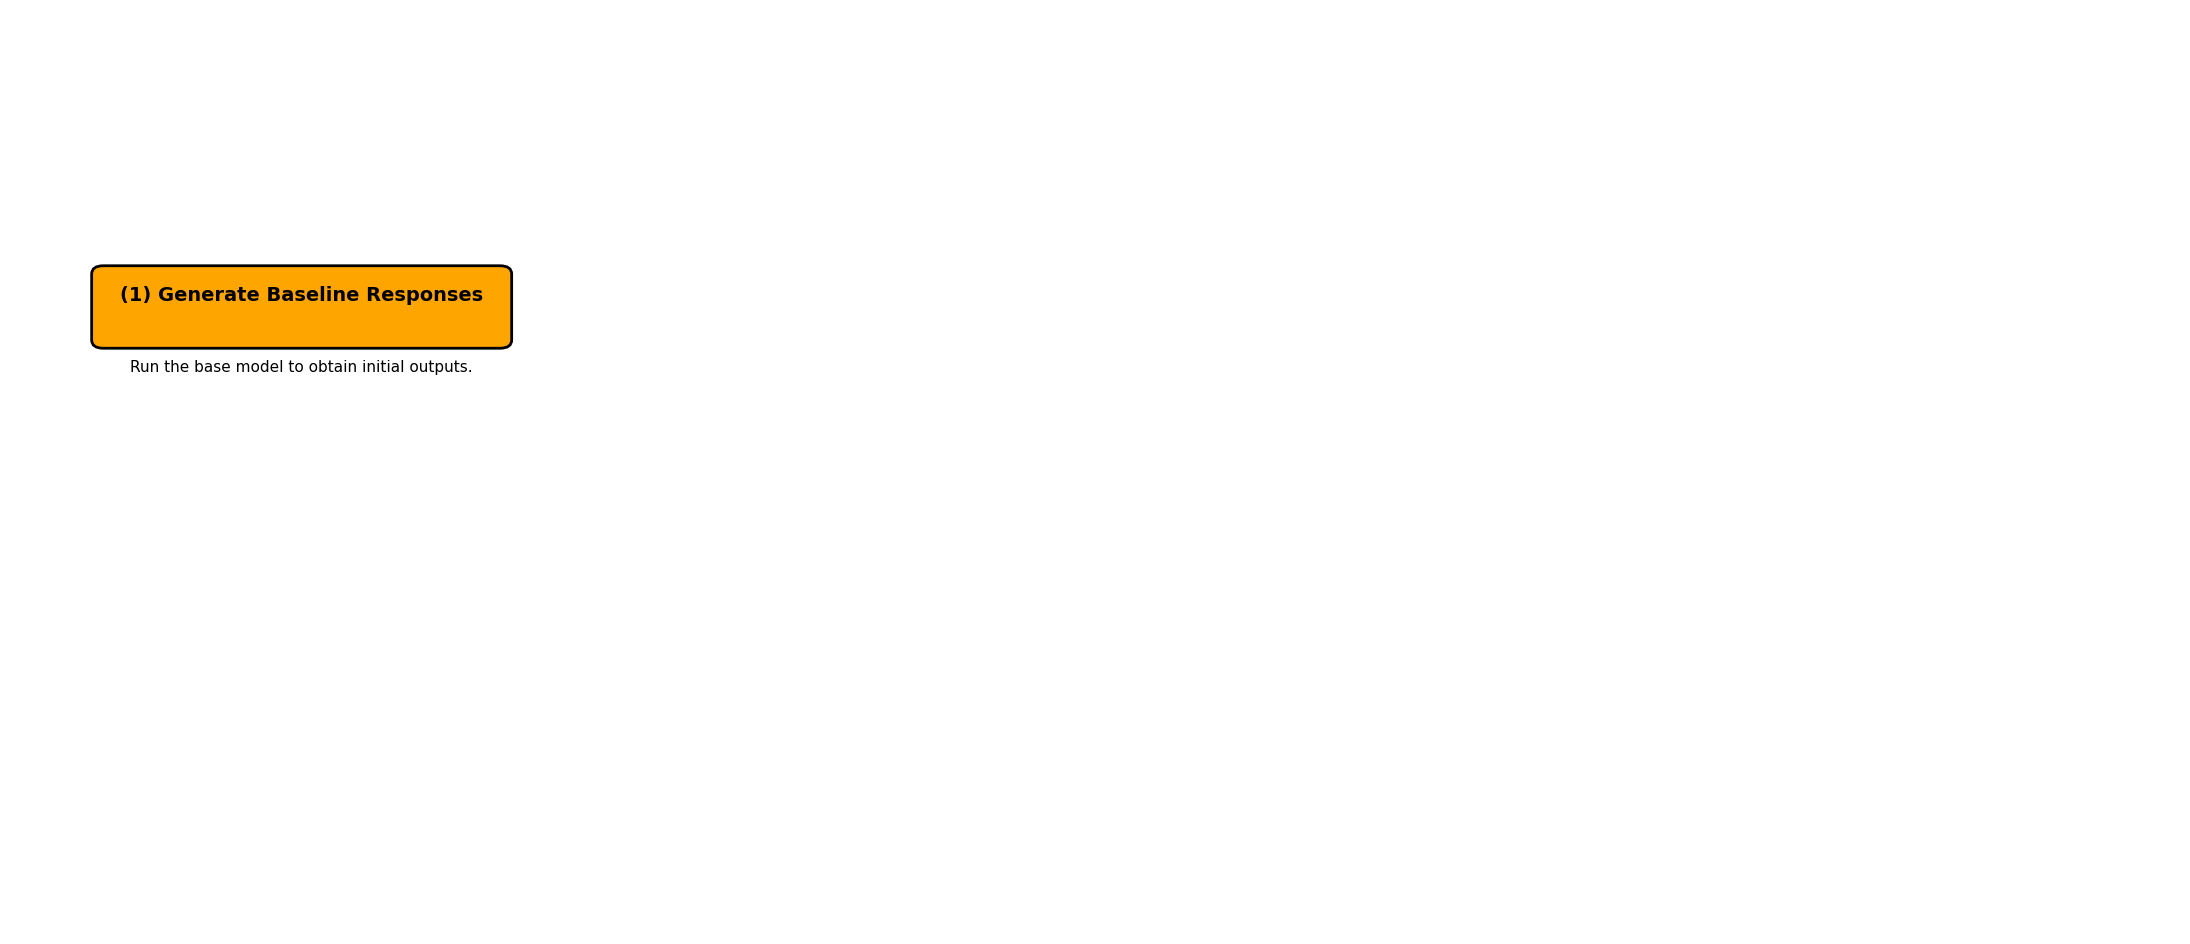

In [23]:
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from matplotlib.animation import FuncAnimation, PillowWriter

# ─────────────────────── 6 overview steps ───────────────────────
# ───────────────────── 6 overview steps ─────────────────────
steps = [
    (
        "(1) Generate Baseline Responses",
        "Run the base model to obtain initial outputs."
    ),
    (
        "(2) Generate Perturbations",
        "Using RATE, create pairs where the perturbed response exhibits the "
        "target bias and the base response does not."
    ),
    (
        "(3) Label Training Data",
        "Identify which responses in a subset of the model’s training data exhibit bias."
    ),
    (
        "(4) Generate Counterfactuals",
        "Select pairs where neither response shows the target bias. Then apply rewrite prompt to inject bias into the rejected response."
    ),
    (
        "(5) Sample Chatbot Arena (Optional)",
        "Draw extra examples from a larger conversational corpus in proportion to the "
        "observed bias frequency, annotate them identically, and include them to guard "
        "against distribution shift."
    ),
    (
        "(6) Fine‑Tune",
        "Fine‑tune the base model on the union of generated counterfactuals and any "
        "supplementary samples."
    )
]


# ───────────── spacious layout parameters ─────────────
rect_w, rect_h = 8.5, 2.0      # bigger box footprint
h_gap, v_gap   = 11, 8         # generous spacing
title_wrap     = 32            # wrap titles at 32 chars
blurb_offset   = 0.6           # space from box to blurb text
fps            = 1             # 1 frame/sec

def grid(i):
    """3 columns on row‑0, 3 on row‑1."""
    row = 0 if i < 3 else 1
    col = i if row == 0 else i - 3
    return col * h_gap, v_gap * (1 - row), row

# ───────────────────── draw one frame ─────────────────────
fig, ax = plt.subplots(figsize=(28, 12))  # ultra‑wide canvas
ax.axis("off")


def draw(frame_idx):
    ax.clear()
    ax.axis("off")
    ax.set_xlim(-2, h_gap * 3 + rect_w + 3)
    ax.set_ylim(-v_gap - 2, v_gap * 2 + 2)

    for i in range(frame_idx + 1):
        title, blurb = steps[i]
        x, y, row = grid(i)

        # ---- box ----
        ax.add_patch(FancyBboxPatch((x, y), rect_w, rect_h,
                                    boxstyle="round,pad=0.25",
                                    facecolor="#FFA500",
                                    linewidth=2.0, zorder=2))

        # ---- text ----
        ax.text(x + rect_w/2, y + rect_h*0.68,
                "\n".join(textwrap.wrap(title, title_wrap)),
                ha="center", va="center", fontsize=14,
                weight="bold", zorder=3)
        ax.text(x + rect_w/2, y - blurb_offset,
                textwrap.fill(blurb, 50),
                ha="center", va="top", fontsize=11, zorder=3)

        # ---- arrows ----
        if i < frame_idx:
            nx, ny, nrow = grid(i + 1)

            # ── CASE 1: same row (straight horizontal) ──
            if row == nrow:
                ax.add_patch(FancyArrowPatch((x + rect_w, y + rect_h/2),
                                             (nx,        ny + rect_h/2),
                                             arrowstyle="->",
                                             linewidth=2,
                                             mutation_scale=20,
                                             zorder=1))
            # ── CASE 2: top‑row → bottom‑row (special diagonal) ──
            # ───── arrow from box‑3 (“Label Training Data”) → box‑4 (“Generate Counterfactuals”)
            # ───── arrow from box‑3 (“Label Training Data”) → box‑4 (“Generate Counterfactuals”)
            elif i == 2 and frame_idx >= 3:
               pass
            
            # ── CASE 3: any other wrap‑down (fallback) ──
            else:
                mid_y = y - (v_gap - rect_h)/2
                ax.add_patch(FancyArrowPatch((x + rect_w, y + rect_h/2),
                                             (x + rect_w, mid_y),
                                             arrowstyle="-",
                                             linewidth=2, zorder=1))
                ax.add_patch(FancyArrowPatch((x + rect_w, mid_y),
                                             (nx, ny + rect_h/2),
                                             arrowstyle="->",
                                             linewidth=2,
                                             mutation_scale=20,
                                             zorder=1))

# build + save
ani = FuncAnimation(fig, draw,
                    frames=len(steps),
                    interval=1000/fps,
                    repeat=False)
ani.save("pipeline_overview.gif", writer=PillowWriter(fps=fps))
print("Saved  →  pipeline_overview.gif")
